In [18]:
%matplotlib qt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import metrics
from sklearn.decomposition import PCA
from prettytable import PrettyTable
from sklearn.cross_validation import train_test_split
import numpy as np
from sklearn.metrics import roc_curve, auc,roc_auc_score,f1_score,confusion_matrix
print (__doc__)

Automatically created module for IPython interactive environment


In [19]:
filename="apnea_clean_1.csv"
f = open(filename)
f.readline()
data = np.loadtxt(fname = f, delimiter = ',',dtype='double')
Y = data[:,data.shape[1]-1]
X = data[:,1:data.shape[1]-1]

# Reading the labels now
f= open(filename)
labels_=np.loadtxt(fname=f,delimiter=',',dtype='string')
labels_=labels_[0,1:data.shape[1]-1]

In [20]:
print 'X: ',X
print 'Y: ',Y
print 'Feature Labels are: ',labels_

X:  [[  1.   1.   3. ...,   0.  31.   1.]
 [  1.   1.   3. ...,   0.  31.   1.]
 [  1.   1.   3. ...,   0.  30.   2.]
 ..., 
 [  1.   3.   4. ...,   0.  29.   1.]
 [  2.   4.   4. ...,   0.  34.   1.]
 [  1.   4.   4. ...,   0.  33.   2.]]
Y:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  0.  1.  0.  1.  0.  1.  0.  1.  1.  1.  1.  0.  0.  1.
  0.  1.  0.  0.  1.  1.  1.  0.  1.  0.  0.  1.  1.  0.  0.  1.  0.  0.
  0.  1.  1.  1.  0.  0.  0.  0.  1.  0.  1.  0.  1.  0.  1.  0.  0.  1.
  0.  1.  1.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  1.  0.  1.
  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  1.  1.  0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  1.
  1.  0.  1.  0.  0.  1.  0.  0.  1.  1.  1.  1.  0.  1.  1.  1.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  

In [21]:
#Normalizing to Zero Mean Unit Variance
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

In [22]:
print 'X: ',X
print 'Y: ',Y

X:  [[-0.51 -2.    0.15 ..., -0.07  0.68 -0.96]
 [-0.51 -2.    0.15 ..., -0.07  0.68 -0.96]
 [-0.51 -2.    0.15 ..., -0.07  0.19  1.04]
 ..., 
 [-0.51 -0.04  1.2  ..., -0.07 -0.3  -0.96]
 [ 1.7   0.93  1.2  ..., -0.07  2.15 -0.96]
 [-0.51  0.93  1.2  ..., -0.07  1.66  1.04]]
Y:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  0.  1.  0.  1.  0.  1.  0.  1.  1.  1.  1.  0.  0.  1.
  0.  1.  0.  0.  1.  1.  1.  0.  1.  0.  0.  1.  1.  0.  0.  1.  0.  0.
  0.  1.  1.  1.  0.  0.  0.  0.  1.  0.  1.  0.  1.  0.  1.  0.  0.  1.
  0.  1.  1.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  1.  0.  1.
  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  1.  1.  0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  1.
  1.  0.  1.  0.  0.  1.  0.  0.  1.  1.  1.  1.  0.  1.  1.  1.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

### Defining Function to plot Confusion matrix 

In [24]:
class_labels_=np.array(['No Apnea','Apnea'])
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_labels_))
    plt.xticks(tick_marks,class_labels_, rotation=45)
    plt.yticks(tick_marks,class_labels_)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [25]:
from sklearn import ensemble
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_predic=clf.predict(X_test)
score=metrics.accuracy_score(y_test,y_predic)

# Evaluation Methods here: Confusion Matrix, F1 Score
print 'Decision Tree Classification Score: ',score
cm=confusion_matrix(y_test,y_predic)
print '\nConfusion Matrix: \n',cm
np.set_printoptions(precision=2)
# Normalize the confusion matrix by row (i.e by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print '\nNormalized Confusion Matrix: \n',(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.show()

Decision Tree Classification Score:  0.619047619048

Confusion Matrix: 
[[25  8]
 [16 14]]

Normalized Confusion Matrix: 
[[ 0.76  0.24]
 [ 0.53  0.47]]


## Decision Tree Visualization

Score for Decision Tree:  0.619047619048


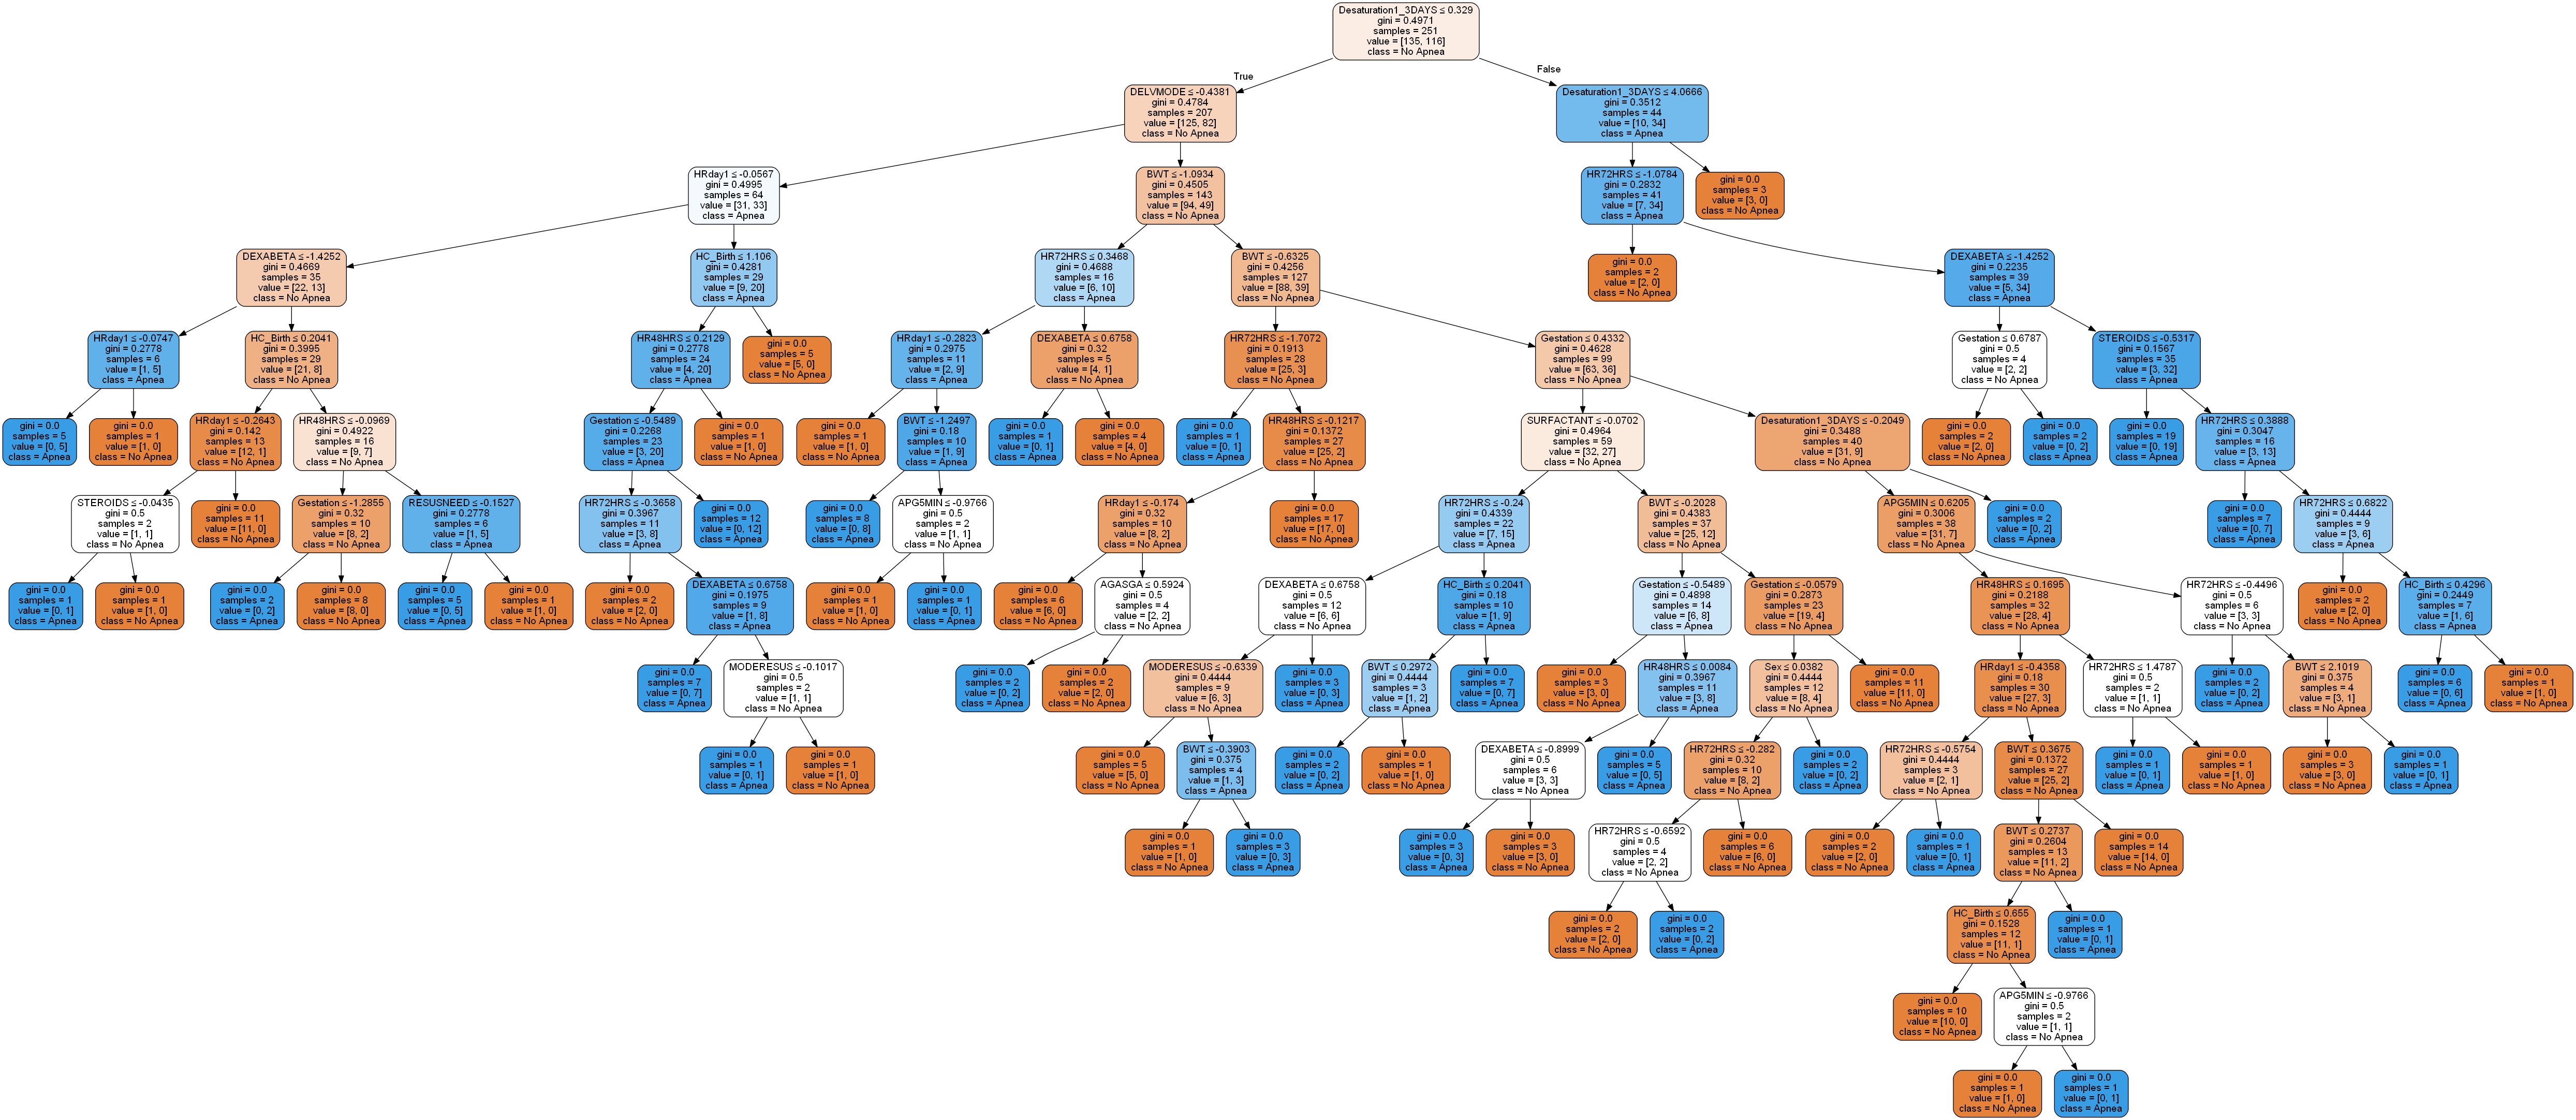

In [28]:
from sklearn.externals.six import StringIO  
from sklearn import tree

clf = tree.DecisionTreeClassifier() 
clf = clf.fit(X_train, y_train)
y_predic=clf.predict(X_test)
print 'Score for Decision Tree: ',metrics.accuracy_score(y_test,y_predic)
import pydotplus
from IPython.display import Image  
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=labels_,  
                         class_names=class_labels_,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [27]:
print labels_

['AGASGA' 'STEROIDS' 'DEXABETA' 'DELVMODE' 'BIRTHCRY' 'APG1MIN' 'APG5MIN'
 'RESUSNEED' 'MODERESUS' 'SURFACTANT' 'ALTE' 'BWT' 'HC_Birth' 'HRday1'
 'HR48HRS' 'HR72HRS' 'Desaturation1_3DAYS' 'Brady1_3DAYS' 'Gestation' 'Sex']


In [ ]:
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), labels_[indices])
plt.xlabel('Relative Importance')
plt.show()